In [6]:
from noise_analysis import *
%matplotlib inline

from neutral_covariance_test import *
from noise_properties_plotting import *

def cm2inch(value):
    return value/2.54;

In [8]:
from elife_settings import set_elife_settings, ELIFE

set_elife_settings()

In [4]:
new = False #True

N = 4

params = {}

steadystate = np.array([0.01, 2, 15, 100]).reshape([N,1]) #np.logspace(-1,2,N).reshape([N,1])

# no interaction
omega = np.zeros([N, N]); np.fill_diagonal(omega, -1)

params['interaction_matrix'] = omega

# no immigration
params['immigration_rate'] = np.zeros([N, 1])

# different growthrates determined by the steady state
params['growthrate'] = - (omega).dot(steadystate)


params['initial_condition'] = np.copy(steadystate) * np.random.normal(1,0.1,steadystate.shape)

params['noise'] = 1e-1

params['noise_linear'] = 1e-1
params['noise_sqrt'] = 1e-2

files_ts_impl = ['study_no_interaction/timeseries_autocorrelation1.csv']

implementations = []

def create_new_files():
    for f in files_ts_impl:
        if os.path.exists(f):
            os.remove(f)
        
        run_timeseries_noise(params, f = f, noise_implementation = NOISE.LANGEVIN_LINEAR, 
                            dt = 0.01, tskip=4, T=50.0, seed=int(time.time()))

if new:
    create_new_files()

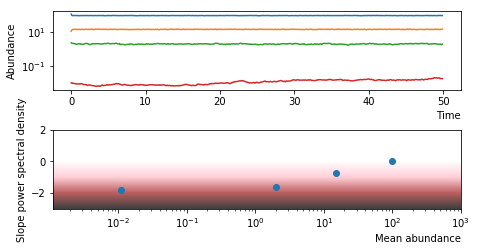

In [5]:
files_ts_impl = ['study_no_interaction/timeseries_autocorrelation1.csv']

fig = plt.figure(figsize=(18/2.54,10/2.54), tight_layout=True) #poster

plot_timeseries_comparison(files_ts_impl, composition = ['ts', 'nc'], fig=fig)

plt.show()

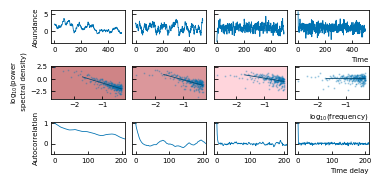

In [11]:
tss = pd.read_csv('study_no_interaction/timeseries_autocorrelation1.csv')

fig = plt.figure(figsize=(ELIFE.TEXTWIDTH,2.5))
gs = gridspec.GridSpec(3,N, hspace=0.7, wspace=0.1, top=0.95, 
                       bottom=0.15, left=0.15, right=0.95)

autocorrelation = {}

for species in ['species_%d' % i for i in range(1,N+1)]:
    R = np.zeros(len(tss))
    
    ts = tss[species].values.flatten()
    mean = np.mean(ts)
    std = np.std(ts)
    
    for i in range(len(ts)):
        R[i] = np.mean((ts[0:len(ts)-i] - mean)*(ts[i:]-mean))/std**2
    
    autocorrelation[species] = R
    
for i in range(N):
    ts = tss['species_%d' % (i+1)][:500]
    ts = ts - np.mean(ts)
    ts = ts/np.std(ts)
    ts += 1
    
    ax_ts = fig.add_subplot(gs[i], sharey=ax_ts if i > 0 else None)
    
    ax_ts.plot(range(len(ts)), ts)
    if i == N-1:
        ax_ts.set_xlabel('Time', ha='right', x=1)
    ax_ts.set_ylabel('Abundance')
    
    ax_psd = fig.add_subplot(gs[N+i], sharey=ax_psd if i > 0 else None)
    
    slope = example_noise_fit(ax_psd, ts)
    
    if slope > 0:
        slope = 0
        
    c = noise_cmap_ww((slope - noise_lim[0])/(noise_lim[1]-noise_lim[0]))
    #ax_psd.set_facecolor(c) #, alpha=0.4)
    
    if i < N-1:
        ax_psd.set_xlabel('')
    elif i == N-1:
        ax_psd.set_xlabel('log$_{10}$(frequency)', x=1, ha='right')
        
    ax_psd.patch.set_facecolor(c)
    ax_psd.patch.set_alpha(0.7)

    ax_corr = fig.add_subplot(gs[2*N+i], sharey=ax_corr if i > 0 else None)

    ax_corr.plot(np.arange(len(ts))[:500], autocorrelation['species_%d' % (i+1)][:500])
    ax_corr.set_xlim([-10,210])
    
    if i == N-1:
        ax_corr.set_xlabel('Time delay', ha='right', x=1)
    if i == 0:
        ax_corr.set_ylabel('Autocorrelation')
        ax_psd.set_ylabel('log$_{10}$(power \n spectral density)')
    
    if (i > 0):
        for ax in [ax_ts, ax_psd, ax_corr]:
            ax.set_ylabel('')
            ax.tick_params(axis='both', left=True, labelleft=False)
    
#plt.savefig('figures/presentationSophie/autocorrelation.pdf')
plt.savefig('figures_elife/supplemental/autocorrelation2.pdf')
plt.show()

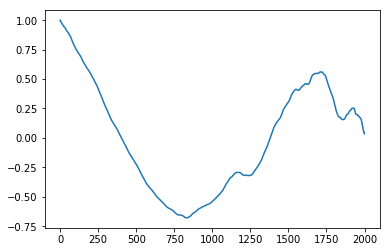

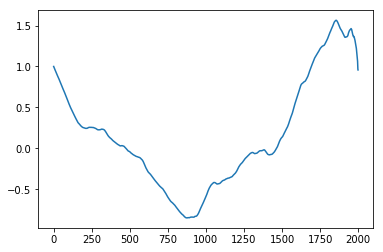

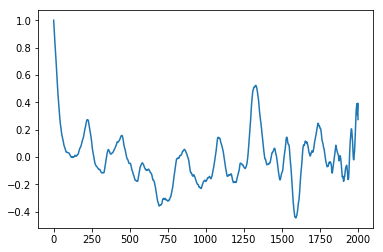

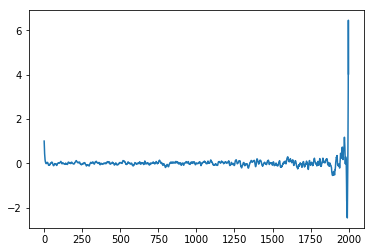

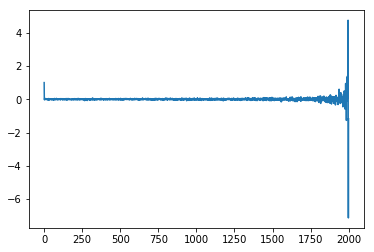

In [10]:
ts = pd.read_csv('study_no_interaction/timeseries_autocorrelation1.csv')

autocorrelation = {}

for species in ['species_%d' % i for i in range(1,N+1)]:
    R = np.zeros(len(ts))
    
    ts_s = ts[species].values.flatten()
    mean = np.mean(ts_s)
    std = np.std(ts_s)
    
    for i in range(len(ts)):
        R[i] = np.mean((ts_s[0:len(ts)-i] - mean)*(ts_s[i:]-mean))/std**2
    
    autocorrelation[species] = R
    
    plt.figure()
    plt.plot(range(len(ts)), R)
    plt.show()